<a href="https://colab.research.google.com/github/SajalSinha/CardioVascular-Risk-Prediction/blob/main/CardiovascularRiskPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [787]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline
import warnings
import pickle
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from  sklearn.model_selection import cross_val_score

In [788]:
df = pd.read_csv("https://raw.githubusercontent.com/SajalSinha/CardioVascular-Risk-Prediction/main/data_cardiovascular_risk.csv")

In [789]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [790]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [791]:
df.describe(include = 'all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


#Outlier Detection

In [792]:
num_features = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [793]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                 1694.50
age                  14.00
education             2.00
cigsPerDay           20.00
BPMeds                0.00
prevalentStroke       0.00
prevalentHyp          1.00
diabetes              0.00
totChol              58.00
sysBP                27.00
diaBP                15.50
BMI                   5.02
heartRate            15.00
glucose              16.00
TenYearCHD            0.00
dtype: float64


In [794]:
print((df[num_features] < (Q1 - 1.5 * IQR)) | (df[num_features] > (Q3 + 1.5 * IQR)))

        BMI  BPMeds  TenYearCHD  ...  prevalentStroke  sysBP  totChol
0     False   False       False  ...            False  False    False
1     False   False       False  ...            False  False    False
2     False   False       False  ...            False  False    False
3     False   False       False  ...            False  False    False
4     False   False       False  ...            False  False    False
...     ...     ...         ...  ...              ...    ...      ...
3385  False   False       False  ...            False  False    False
3386  False   False       False  ...            False  False    False
3387  False   False       False  ...            False  False     True
3388  False   False       False  ...            False  False    False
3389  False   False       False  ...            False  False    False

[3390 rows x 15 columns]


In [795]:
df[num_features] = df[num_features][~((df[num_features] < (Q1 - 1.5 * IQR)) |(df[num_features] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(3390, 17)

In [796]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64.0,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36.0,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46.0,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50.0,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64.0,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


#Dummies

In [797]:
sex = pd.get_dummies(df['sex'],prefix='sex')
# sex = sex.drop(['sex_0'],axis=1)

is_smoking = pd.get_dummies(df['is_smoking'],prefix='is_smoking')
# is_smoking = is_smoking.drop(['is_smoking_0'],axis=1)

In [798]:
df = pd.concat([df,sex,is_smoking],axis=1)
# df = df.drop(['sex','is_smoking'],axis=1)
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,0,64.0,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,1,0,0,1
1,1,36.0,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,1,1,0
2,2,46.0,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0,0,1
3,3,50.0,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1,0,1
4,4,64.0,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0,0,1


# To check Null values

In [799]:
# to form dataframe of null values and represent them in %age form which will be helpfull in knowing if we had 
# to drop any column right away

missing_values = pd.DataFrame(df.isnull().mean()*100) 
missing_values

,0
id,0.000000
age,12.241888
education,2.566372
sex,0.000000
is_smoking,0.000000
cigsPerDay,12.772861
BPMeds,1.297935
prevalentStroke,0.000000
prevalentHyp,0.000000
diabetes,0.000000


In [800]:
df.isnull().sum()

id                   0
age                415
education           87
sex                  0
is_smoking           0
cigsPerDay         433
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol            448
sysBP              415
diaBP              415
BMI                426
heartRate          416
glucose            693
TenYearCHD           0
sex_F                0
sex_M                0
is_smoking_NO        0
is_smoking_YES       0
dtype: int64

In [801]:
list(df['BPMeds'].unique())

[0.0, nan, 1.0]

In [802]:
list(df['education'].unique())

[2.0, 4.0, 1.0, 3.0, nan]

In [803]:
# BMI, totChol, cigsperDay, glucose, heartRate, diaBP, sysBP, age
# are some parameters whose missing values can be easily filled with mean values of that resp. column.
# BPMeds, Education are some parameters whose missing values can be easily filled with mode values of that resp. column

In [804]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['totChol'] = df['totChol'].fillna(df['totChol'].mean())
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())
df['diaBP'] = df['diaBP'].fillna(df['diaBP'].mean())
df['sysBP'] = df['sysBP'].fillna(df['sysBP'].mean())
df['age'] = df['age'].fillna(df['age'].mean())

In [805]:
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [806]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
sex_F              0
sex_M              0
is_smoking_NO      0
is_smoking_YES     0
dtype: int64

#EDA

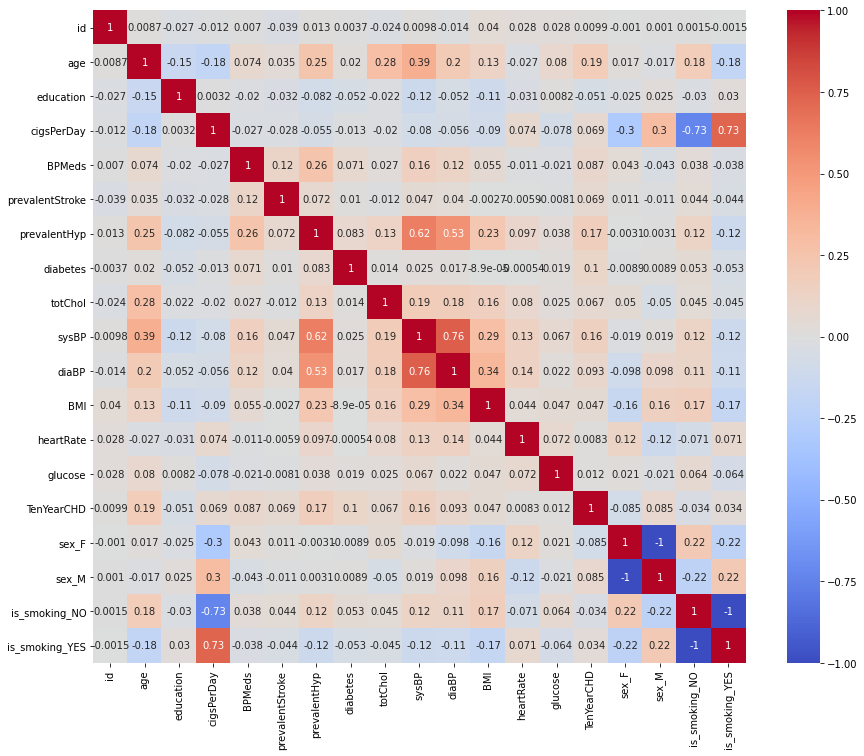

In [807]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

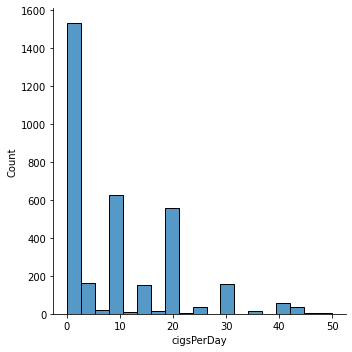

In [808]:
sns.displot(df['cigsPerDay'])

In [888]:
df.loc[df['cigsPerDay'] >= 45]

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
195,38.0,2.0,50.0,0.0,0,0,0,300.0,120.0,74.0,28.74,70.0,78.000000,0,0,1,0,1
244,51.0,1.0,50.0,0.0,0,0,0,335.0,125.5,94.0,27.77,80.0,67.000000,0,0,1,0,1
253,55.0,1.0,45.0,0.0,0,0,0,345.0,134.0,89.0,27.38,72.0,60.000000,0,0,1,0,1
281,43.0,2.0,45.0,0.0,0,1,0,201.0,126.0,82.0,29.48,76.0,92.000000,0,0,1,0,1
1146,47.0,2.0,50.0,0.0,0,0,0,217.0,145.0,89.0,28.88,82.0,75.000000,0,0,1,0,1
1847,53.0,1.0,50.0,0.0,0,0,0,306.0,127.0,82.5,31.22,72.0,78.313682,0,0,1,0,1
2244,40.0,1.0,50.0,0.0,0,0,0,220.0,124.0,79.0,20.70,90.0,57.000000,0,1,0,0,1


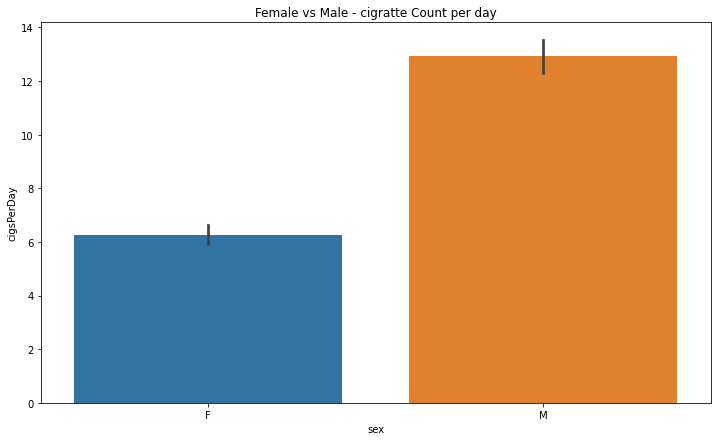

In [809]:
plt.figure(figsize=(12,7))
sns.barplot(x='sex', y = 'cigsPerDay', data= df)
plt.title('Female vs Male - cigratte Count per day')
plt.show()

# Males consume more cigrattes than females per day.

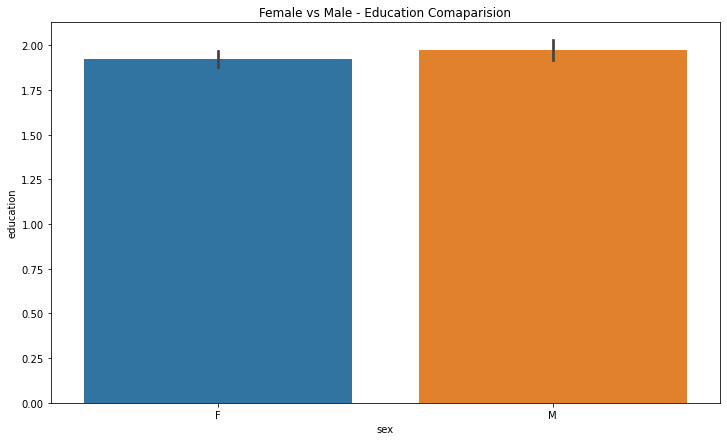

In [810]:
plt.figure(figsize=(12,7))
sns.barplot(x='sex', y = 'education', data= df)
plt.title('Female vs Male - Education Comaparision')
plt.show()

#Both males and females those who smoke are well educated.

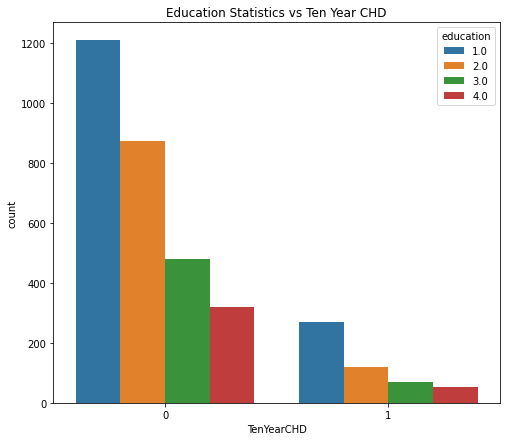

In [811]:
plt.figure(figsize=(8,7))
sns.countplot(x='TenYearCHD', hue = 'education', data= df)
plt.title('Education Statistics vs Ten Year CHD')
plt.show()

# People with less education are more prone to have heart disease after 10 years.

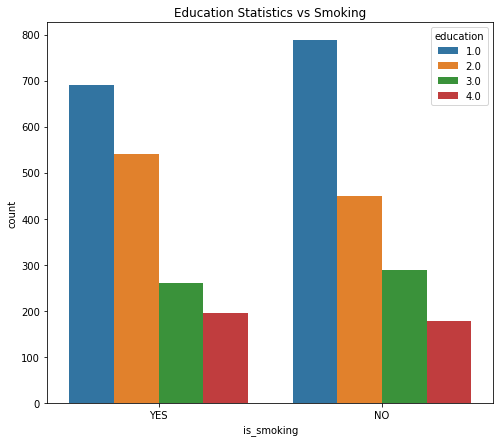

In [812]:
plt.figure(figsize=(8,7))
sns.countplot(x='is_smoking', hue = 'education', data= df)
plt.title('Education Statistics vs Smoking')
plt.show()

# People with less education are more prone to get addicted to smoking.

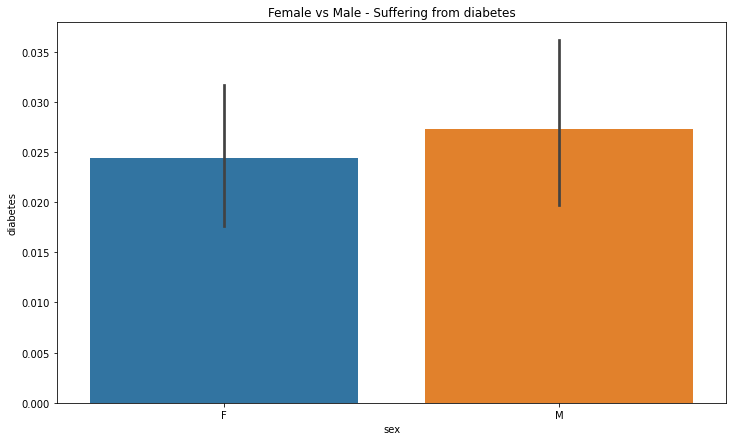

In [813]:
plt.figure(figsize=(12,7))
sns.barplot(x='sex', y = 'diabetes', data= df)
plt.title('Female vs Male - Suffering from diabetes')
plt.show()

# More males are suffering from diabetes than female.

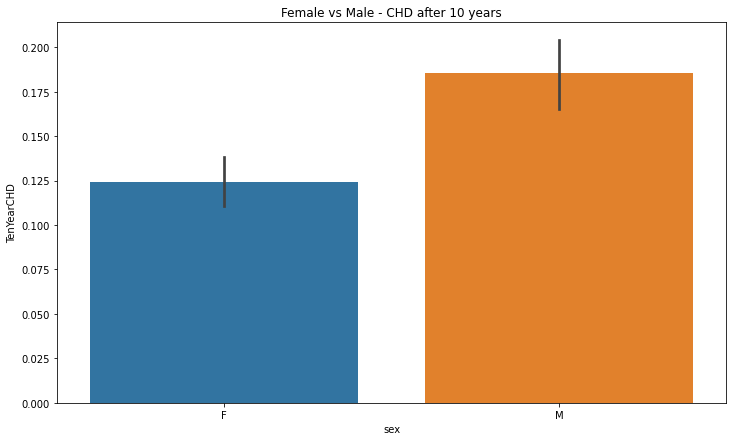

In [814]:
plt.figure(figsize=(12,7))
sns.barplot(x='sex', y = 'TenYearCHD', data= df)
plt.title('Female vs Male - CHD after 10 years')
plt.show()

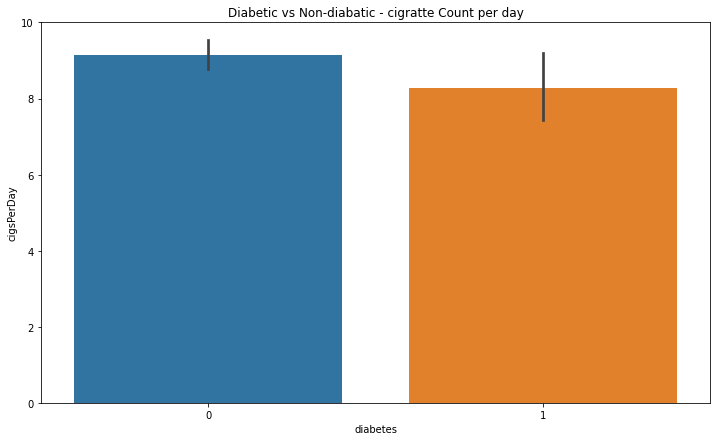

In [815]:
plt.figure(figsize=(12,7))
sns.barplot(x='diabetes', y = 'cigsPerDay', data= df)
plt.title('Diabetic vs Non-diabatic - cigratte Count per day')
plt.show()

#Non diabetic people smoke more as compared to diabetic people.

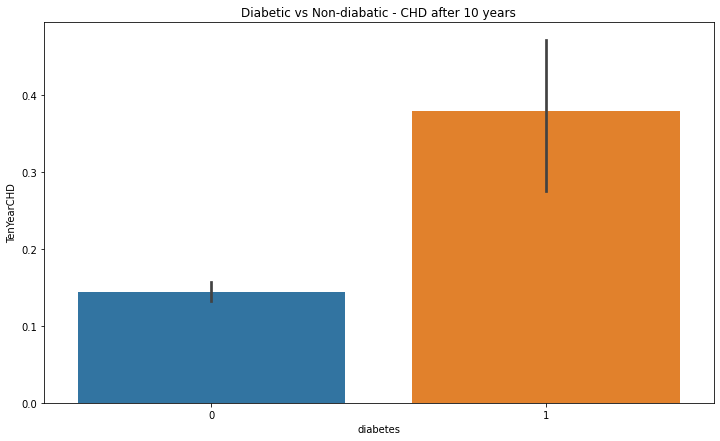

In [816]:
plt.figure(figsize=(12,7))
sns.barplot(x='diabetes', y = 'TenYearCHD', data= df)
plt.title('Diabetic vs Non-diabatic - CHD after 10 years')
plt.show()

# Diabetic people are more prone to heart disease.

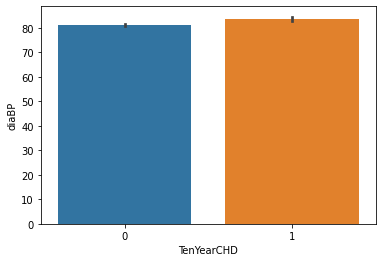

In [891]:
sns.barplot(x = df['TenYearCHD'], y = df['diaBP'])

# Those who have low BP are less prone to heart disease.

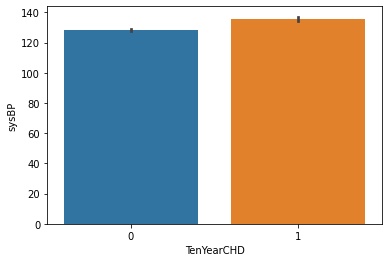

In [892]:
sns.barplot(x = df['TenYearCHD'], y = df['sysBP'])


# Those who have high BP are more prone to heart disease.

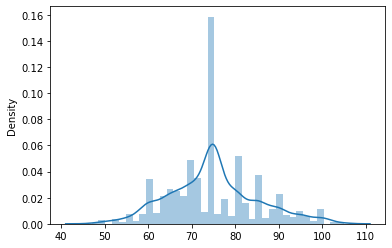

In [817]:
sns.distplot(x = df['heartRate'])

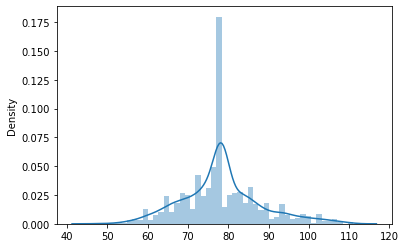

In [818]:
sns.distplot(x = df['glucose'])

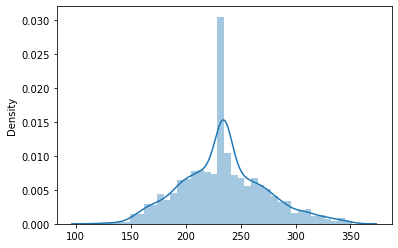

In [819]:
sns.distplot(x = df['totChol'])

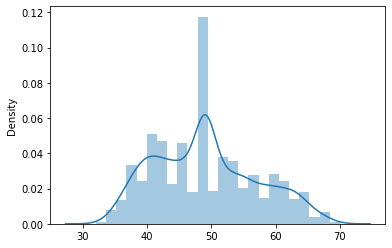

In [820]:
sns.distplot(x = df['age'])

## Conclusions


1.   Highest Number of cigratte smoked in a day is 50.
2.   Males consume more cigrattes than females in a day.
3.   People with less education are more prone to have heart disease after 10 years.
4.   People with less education are more prone to get addicted to smoking.
5.   More males are suffering from diabetes than female.
6.   Those who have high BP are more prone to heart disease.
7.   Those who have low BP are less prone to heart disease.
8.   



# Data Processing

## Standard Scalling

In [821]:
df.drop('id',axis=1,inplace = True)

In [822]:
df = df.drop(['sex','is_smoking'],axis=1)
y=df['TenYearCHD']
X=df.drop('TenYearCHD',axis=1)

In [823]:
sc = StandardScaler()
X = sc.fit_transform(df[num_features])

In [824]:
np.random.seed(0)
df_train_feat, df_test_feat = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Feature Selection

In [825]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [826]:
df_test_feat.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
1866,54.0,1.0,17.0,0.0,0,0,0,205.0,96.0,66.0,23.26,85.0,75.0,0,1,0,0,1
646,38.0,3.0,0.0,0.0,0,0,0,305.0,130.0,95.0,23.10,65.0,78.0,1,0,1,1,0
2261,60.0,3.0,0.0,0.0,0,0,0,325.0,123.0,79.0,25.82,63.0,85.0,0,1,0,1,0
1645,51.0,3.0,0.0,0.0,0,0,0,230.0,134.0,84.0,23.54,80.0,78.0,0,1,0,1,0
496,50.0,2.0,0.0,0.0,0,0,0,258.0,129.0,84.0,24.56,80.0,75.0,0,0,1,1,0


In [827]:
y__train = df_train_feat.pop('TenYearCHD')
X__train = df_train_feat

In [828]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X__train, y__train)
rfe = RFE(lm, 12)             
rfe = rfe.fit(X__train, y__train)

In [829]:
list(zip(df_train_feat.columns,rfe.support_,rfe.ranking_))

[('age', True, 1),
 ('education', True, 1),
 ('cigsPerDay', True, 1),
 ('BPMeds', True, 1),
 ('prevalentStroke', True, 1),
 ('prevalentHyp', True, 1),
 ('diabetes', True, 1),
 ('totChol', False, 5),
 ('sysBP', False, 2),
 ('diaBP', True, 1),
 ('BMI', False, 3),
 ('heartRate', False, 6),
 ('glucose', False, 4),
 ('sex_F', True, 1),
 ('sex_M', True, 1),
 ('is_smoking_NO', True, 1),
 ('is_smoking_YES', True, 1)]

In [830]:
col = X__train.columns[rfe.support_]
col

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'diaBP', 'sex_F', 'sex_M', 'is_smoking_NO',
       'is_smoking_YES'],
      dtype='object')

In [831]:
X__train.columns[~rfe.support_]

Index(['totChol', 'sysBP', 'BMI', 'heartRate', 'glucose'], dtype='object')

In [832]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X__train[col]

In [833]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [834]:
lm = sm.OLS(y__train,X_train_rfe).fit()

In [835]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     18.57
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           3.59e-33
Time:                        13:00:21   Log-Likelihood:                -785.60
No. Observations:                2373   AIC:                             1593.
Df Residuals:                    2362   BIC:                             1657.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1072      0.040     

In [836]:
X_train_new = X_train_rfe.drop(['prevalentStroke'], axis=1)

In [837]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y__train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     19.66
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           3.98e-32
Time:                        13:00:21   Log-Likelihood:                -789.73
No. Observations:                2373   AIC:                             1599.
Df Residuals:                    2363   BIC:                             1657.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1069      0.040     -2.

In [838]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [839]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,sex_F,inf
8,sex_M,inf
9,is_smoking_NO,inf
10,is_smoking_YES,inf
2,cigsPerDay,2.31
4,prevalentHyp,1.53
6,diaBP,1.43
0,age,1.14
3,BPMeds,1.08
1,education,1.03


In [840]:
X_train_new = X_train_new.drop(["sex_F"],axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y__train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     19.66
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           3.98e-32
Time:                        13:00:21   Log-Likelihood:                -789.73
No. Observations:                2373   AIC:                             1599.
Df Residuals:                    2363   BIC:                             1657.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1551      0.053     -2.

In [841]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,is_smoking_YES,67.12
8,is_smoking_NO,66.46
2,cigsPerDay,2.31
4,prevalentHyp,1.53
6,diaBP,1.43
0,age,1.14
7,sex_M,1.12
3,BPMeds,1.08
1,education,1.03
5,diabetes,1.02


In [842]:
X_train_new = X_train_new.drop(['is_smoking_YES'], axis=1)

In [843]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y__train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     19.66
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           3.98e-32
Time:                        13:00:21   Log-Likelihood:                -789.73
No. Observations:                2373   AIC:                             1599.
Df Residuals:                    2363   BIC:                             1657.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2240      0.080     -2.786

In [844]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,diaBP,41.00
0,age,32.69
1,education,4.44
8,is_smoking_NO,4.42
2,cigsPerDay,3.72
7,sex_M,1.97
4,prevalentHyp,1.77
3,BPMeds,1.12
5,diabetes,1.04


In [845]:
X_train_new = X_train_new.drop(['diaBP'], axis=1)

In [846]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y__train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     22.06
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           1.05e-32
Time:                        13:00:21   Log-Likelihood:                -789.99
No. Observations:                2373   AIC:                             1598.
Df Residuals:                    2364   BIC:                             1650.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2681      0.052     -5.165

In [847]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,age,9.87
7,is_smoking_NO,4.18
1,education,4.04
2,cigsPerDay,3.43
6,sex_M,1.95
4,prevalentHyp,1.66
3,BPMeds,1.12
5,diabetes,1.04


In [848]:
X_train_new = X_train_new.drop(['age'], axis=1)

In [849]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y__train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     14.84
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           4.67e-19
Time:                        13:00:22   Log-Likelihood:                -824.42
No. Observations:                2373   AIC:                             1665.
Df Residuals:                    2365   BIC:                             1711.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1131      0.025      4.523

In [850]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,education,3.04
1,cigsPerDay,2.37
6,is_smoking_NO,2.33
5,sex_M,1.88
3,prevalentHyp,1.57
2,BPMeds,1.11
4,diabetes,1.04


# Data Spliting

In [851]:
# Num Features to be used are : education, cigsPerDay, is_smoking_NO, sex_M, prevalentHyp, BPMeds and Diabetes
X = df[['education','cigsPerDay','is_smoking_NO','sex_M','prevalentHyp','BPMeds','diabetes']]
y = df['TenYearCHD']

In [852]:
#Splitting of dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [853]:
X_train.head()

,education,cigsPerDay,is_smoking_NO,sex_M,prevalentHyp,BPMeds,diabetes
2134,1.0,0.0,1,0,0,0.0,0
1161,2.0,9.0,0,1,0,0.0,0
137,1.0,43.0,0,1,1,0.0,0
2170,1.0,0.0,1,0,0,0.0,0
2876,2.0,0.0,1,1,0,0.0,0


In [854]:
# Stores the accuracies obtained by employing various ML models
accuracies = {}

# Model Training

**Defining Confusion Matrix Function**


In [855]:
# Confusion matrix  
from sklearn.metrics import confusion_matrix, classification_report 
def confusion_matrix_compute(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred) 
    conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
    plt.figure(figsize = (8, 5)) 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") 
    plt.show() 
  
    print('The details for confusion matrix is =') 
    print (classification_report(y_test, y_pred))

## Logistic Regression

In [856]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
chances=(sum(y_pred)/y_pred.size)*100
acc = logreg.score(X_test,y_test)*100 
accuracies['Logistic Regression'] = acc
print("Heart Disease Risk Prediction : {:.2f}%".format(chances))
print("Logistic Regression Model Accuracy is {:.2f}%".format(acc))

Heart Disease Risk Prediction : 0.74%
Logistic Regression Model Accuracy is 84.81%


CONFUSION MATRIX


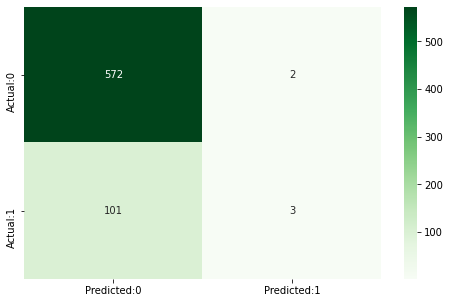

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       574
           1       0.60      0.03      0.06       104

    accuracy                           0.85       678
   macro avg       0.72      0.51      0.49       678
weighted avg       0.81      0.85      0.79       678



In [857]:
print("CONFUSION MATRIX")
confusion_matrix_compute(y_test,y_pred)

##KNN Classifier

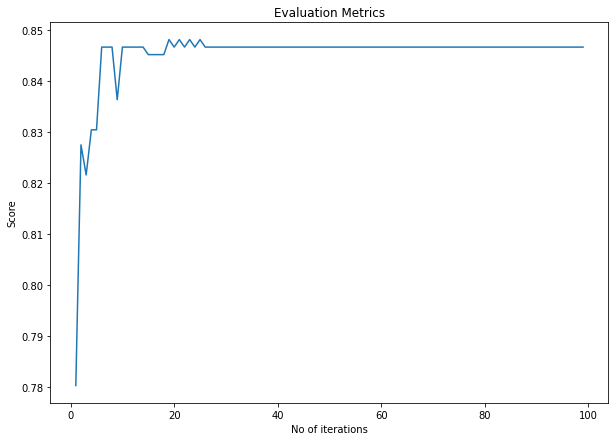

In [879]:
# KNN Classsifier
from sklearn.neighbors import KNeighborsClassifier
score_metrics=[]
chances=[]
iterations=100
for i in range(1,iterations):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    chances.append((sum(y_pred)/y_pred.size)*100)
    score_metrics.append(knn.score(X_test,y_test))

plt.figure(figsize=(10,7))
plt.plot(range(1,iterations),score_metrics)
plt.title("Evaluation Metrics")
plt.xlabel("No of iterations")
plt.ylabel("Score")
plt.show()

CONFUSION MATRIX


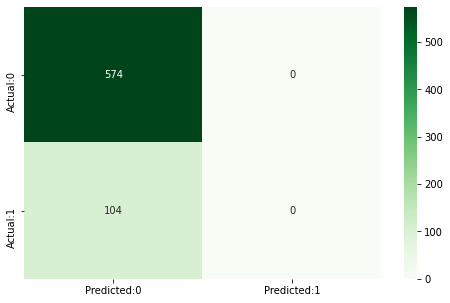

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       574
           1       0.00      0.00      0.00       104

    accuracy                           0.85       678
   macro avg       0.42      0.50      0.46       678
weighted avg       0.72      0.85      0.78       678



In [880]:
print("CONFUSION MATRIX")
confusion_matrix_compute(y_test,y_pred)

In [881]:
acc=max(score_metrics)*100
max_index = np.argmax(score_metrics)
print("Heart Disease Risk Prediction : {:.2f}%".format(chances[max_index]))
accuracies['KNN']=acc
print("Max Model Accuracy is {:.2f}%".format(acc),"at iteration no. {:.2f}".format(max_index))
print("KNN Model Accuracy is {:.2f}%".format(acc))

Heart Disease Risk Prediction : 0.15%
Max Model Accuracy is 84.81% at iteration no. 18.00
KNN Model Accuracy is 84.81%


## SVM

In [861]:
# SVM Classifier using various kernels
kernels=["linear","rbf","poly","sigmoid"]
chances=[]
svc_scores=[]
for i in range (len(kernels)):
    clf=SVC(kernel=kernels[i])
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    chances.append((sum(y_pred)/y_pred.size)*100)
    svc_scores.append(clf.score(X_test,y_test))

CONFUSION MATRIX


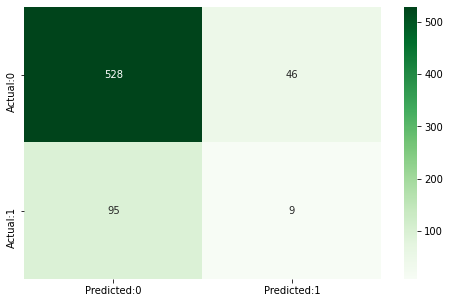

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       574
           1       0.16      0.09      0.11       104

    accuracy                           0.79       678
   macro avg       0.51      0.50      0.50       678
weighted avg       0.74      0.79      0.76       678



In [862]:
print("CONFUSION MATRIX")
confusion_matrix_compute(y_test,y_pred)

Heart Disease Risk Prediction : 0.00%
Max Model Accuracy obtained is 84.66% 
SVM Model Accuracy is 84.66% 


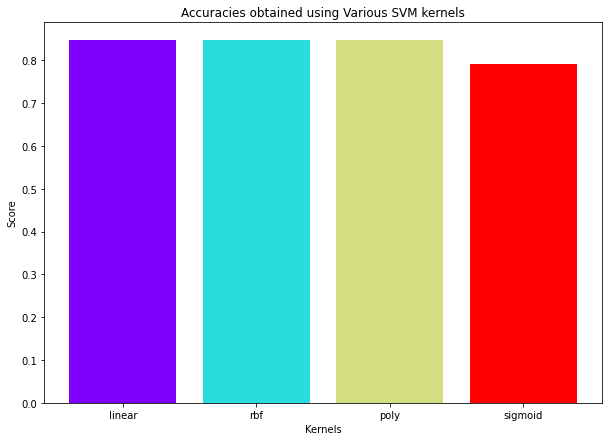

In [863]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.figure(figsize=(10,7))
plt.bar(kernels,svc_scores,color=colors)
plt.xlabel("Kernels")
plt.ylabel("Score")
plt.title("Accuracies obtained using Various SVM kernels")
acc=max(svc_scores)*100
max_index = np.argmax(svc_scores)
accuracies['SVM']=acc
print("Heart Disease Risk Prediction : {:.2f}%".format(chances[max_index]))
print("Max Model Accuracy obtained is {:.2f}% ".format(acc))
print("SVM Model Accuracy is {:.2f}% ".format(acc))

## Naive Baye's

In [864]:
# Naive Bayes
nb_classifier=GaussianNB()
nb_classifier.fit(X_train,y_train)
y_pred=nb_classifier.predict(X_test)

CONFUSION MATRIX


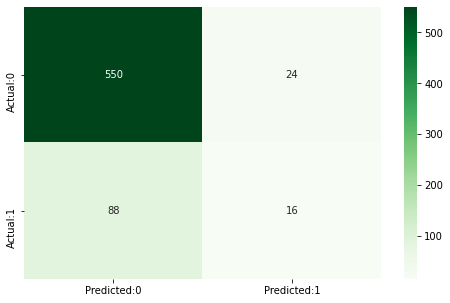

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       574
           1       0.40      0.15      0.22       104

    accuracy                           0.83       678
   macro avg       0.63      0.56      0.56       678
weighted avg       0.79      0.83      0.80       678



In [865]:
print("CONFUSION MATRIX")
confusion_matrix_compute(y_test,y_pred)

In [866]:
chances=(sum(y_pred)/y_pred.size)*100
acc=nb_classifier.score(X_test,y_test)*100
accuracies['Naive Bayes']=acc
print("Heart Disease Risk Prediction : {:.2f}%".format(chances))
print("Naive Bayes Model Accuracy is {:.2f}%".format(acc))

Heart Disease Risk Prediction : 5.90%
Naive Bayes Model Accuracy is 83.48%


In [867]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_scores=[]
chances=[]
for i in range(1,7):
    dt_clf=DecisionTreeClassifier(max_features=i,criterion='entropy', random_state=0)
    dt_clf.fit(X_train,y_train)
    y_pred=dt_clf.predict(X_test)
    chances.append((sum(y_pred)/y_pred.size)*100)
    dt_scores.append(dt_clf.score(X_test,y_test))

CONFUSION MATRIX


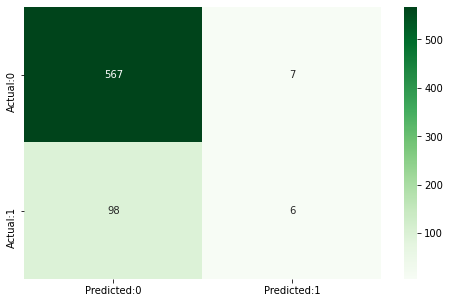

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       574
           1       0.46      0.06      0.10       104

    accuracy                           0.85       678
   macro avg       0.66      0.52      0.51       678
weighted avg       0.79      0.85      0.79       678



In [868]:
print("CONFUSION MATRIX")
confusion_matrix_compute(y_test,y_pred)

In [869]:
acc=max(dt_scores)*100
max_index = np.argmax(dt_scores)
print("Heart Disease Risk Prediction : {:.2f}%".format(chances[max_index]))
print("Decision Tree Classifier Model Accuracy is {:.2f}% at maximum feature={:.0f}".format(acc,max_index))
accuracies['Decision Tree']=acc

Heart Disease Risk Prediction : 2.21%
Decision Tree Classifier Model Accuracy is 84.81% at maximum feature=4


In [870]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_scores=[]
estimators = [10, 100, 200, 500, 1000]
chances=[]
for i in estimators:
    rf_clf=RandomForestClassifier(n_estimators=i,criterion='entropy', random_state=0)
    rf_clf.fit(X_train,y_train)
    y_pred=rf_clf.predict(X_test)
    chances.append((sum(y_pred)/y_pred.size)*100)
    rf_scores.append(dt_clf.score(X_test,y_test))

CONFUSION MATRIX


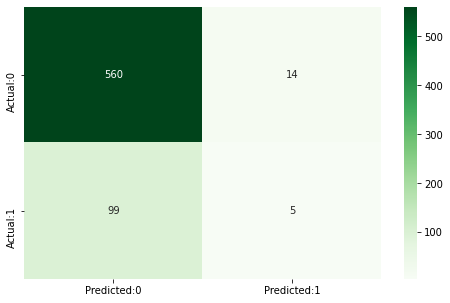

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       574
           1       0.26      0.05      0.08       104

    accuracy                           0.83       678
   macro avg       0.56      0.51      0.49       678
weighted avg       0.76      0.83      0.78       678



In [871]:
print("CONFUSION MATRIX")
confusion_matrix_compute(y_test,y_pred)

In [872]:
acc=max(rf_scores)*100
max_index = np.argmax(rf_scores)
print("Heart Disease Risk Prediction : {:.2f}%".format(chances[max_index]))
print("RandomForest Classifier Model Accuracy is {:.2f}% at maximum feature={:.0f}".format(acc,max_index))
accuracies['Random Forest']=acc

Heart Disease Risk Prediction : 3.39%
RandomForest Classifier Model Accuracy is 84.51% at maximum feature=0


# K- Fold Cross validation on all models

In [882]:
print("k fold Cross Val Score")
print("logistic={:.2f}%".format(np.mean(cross_val_score(logreg,X,y,cv=10))*100))
knn=KNeighborsClassifier(n_neighbors=7)
print("KNN ={:.2f}%".format(np.mean(cross_val_score(knn,X,y,cv=10))*100))
nb_classifier=GaussianNB()
print("Gaussian Naive Bayes={:.2f}%".format(np.mean(cross_val_score(nb_classifier,X,y,cv=10))*100))
clf=SVC(kernel="rbf")
print("SVC={:.2f}%".format(np.mean(cross_val_score(clf,X,y,cv=10))*100))
dt_clf=DecisionTreeClassifier(max_features=4,criterion='entropy', random_state=0)
print("Decision Tree Classifier={:.2f}%".format(np.mean(cross_val_score(dt_clf,X,y,cv=10))*100))
rf_clf=RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0)
print("Random Forest Classifier={:.2f}%".format(np.mean(cross_val_score(rf_clf,X,y,cv=10))*100))

k fold Cross Val Score
logistic=85.01%
KNN =84.07%
Gaussian Naive Bayes=83.22%
SVC=84.93%
Decision Tree Classifier=83.86%
Random Forest Classifier=83.27%


# Accuracies of all model

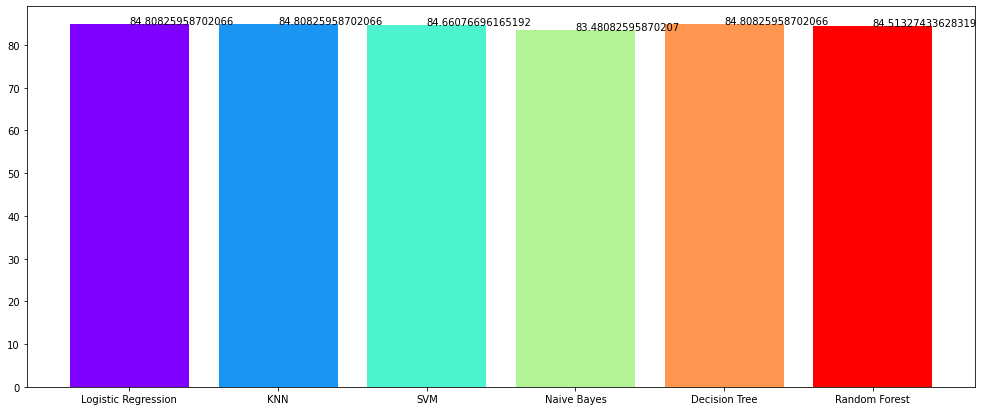

In [878]:
model=list(accuracies.keys())
score=list(accuracies.values())
colors = rainbow(np.linspace(0, 1, len(model)))
plt.figure(figsize=(17,7))
plt.bar(model,score,color=colors,width=0.8)
for i in range(len(model)):
    plt.text(i, score[i],score[i])